In [2]:
use Math::Polygons;
use Physics::Measure;

#This Jupyter notebook is intended to show how Physics::Measure can be combined with simple SVG drawings to illustrate
#simple concepts such as how many gallons does it take to fill a swimming pool.

#This cell is needed to specialize the math classes such as Drawing, Point and Rectangle provided by Math::Polygons
#by mixing in the Physics::Measure concepts such as Distance and Area. Usually this cell should be left unchanged.

class M-Drawing is Drawing {
    has Str $!scale-units = 'm';

    method scale() {
        @.elements.map(-> $e { $e.scale( $!scale-units ) });
    }
}
class M-Point is Point {
    has Distance $.x;
    has Distance $.y;

    method scale( $su ) {
        $!x .= in( "$su" ); 
        $!y .= in( "$su" ); 
    }
}
class M-Rectangle is Rectangle {
    has M-Point  $.origin;
    has Distance $.width is rw;
    has Distance $.height is rw;

    method scale( $su ) {
        $!width  .= in( "$su" ); 
        $!height .= in( "$su" ); 
    }
    method area( --> Area ) {
        $.height * $.width
    }
}
class M-Square is Square {
    has M-Point  $.origin;
    has Distance $.side is rw;

    method scale( $su ) {
        $!side .= in( "$su" ); 
    }
    method area( --> Area ) {
        $.side ** 2
    }
}
#### here endeth the specializations

(M-Square)

In [9]:
use Physics::Measure;

#Here is the main part of this code example. This cell is a great place to experiment with values and units and to 
#see what is going on within the various rectagular objects. Checkout the eg/Synopsis workbook to get a better idea 
#of what can be done with Physics::Measure and the usage of the ♎️ (libra) operator shorthand.

my $x ♎️ '30 m';
my $y ♎️ '20 m';
my $w ♎️ '120 m';
my $h ♎️ '80 m';
my $s ♎️ '100 ft';

my $rectangle = M-Rectangle.new(
    origin => M-Point.new($x, $y),
    width  => $w,
    height => $h, 
);
my $square = M-Square.new(
    origin => M-Point.new( ( ( 2 * $x ) + $w ), $y),
    side   => $s, 
);
my $drawing = M-Drawing.new( elements => [
    $rectangle,
    $square,
]);

#pre scale & draw
say "Square Side:       {$square.side}";
say "Square Area:       {$square.area}";

Square Side:       100 ft
Square Area:       10000 ft2


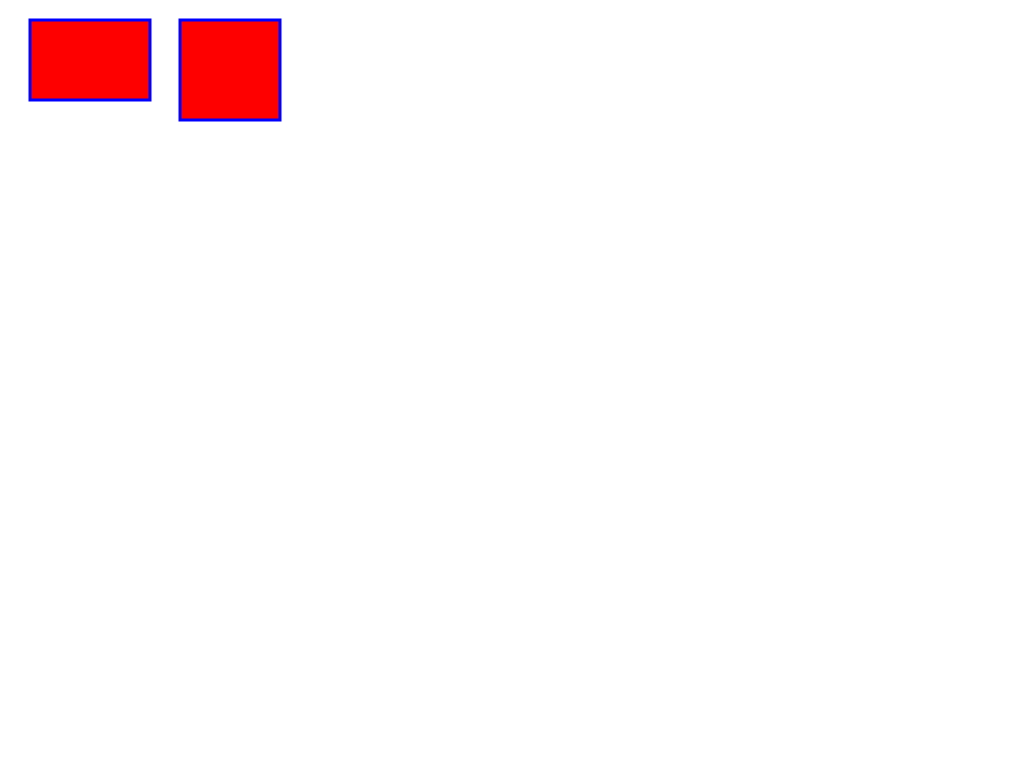

In [7]:
#Now to draw the objects

$drawing.scale;
$drawing.serialize.say;

In [6]:
#And finally to do some math and see how Physics::Measure automagically adapts the units and values

say "Rectangle Width:   {$rectangle.width}";
say "Rectangle Height:  {$rectangle.height}";
say "Rectangle Area:    {$rectangle.area}";
say "Square Side:       {$square.side}";
say "Square Area:       {$square.area}";

Rectangle Width:   120 m
Rectangle Height:  80 m
Rectangle Area:    9600 m2
Square Side:       30.48 m
Square Area:       929.0304 m2
